In [11]:
# 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sys
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Add src directory to path
sys.path.append(os.path.abspath('../src'))
# Check that Python can see the file
import data_loader
print(dir(data_loader))  # Should list 'load_mh_data'



['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [12]:
## 2. Load and inspect data 
data = pd.read_csv('../data/raw/synthetic_mh_data.csv')

print("Dataset Overview:")
print(f"Shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

print("\nBasic Statistics:")
print(data.describe())
#OR
print("\nBasic Info:")
data.info()

# : Missing data analysis
print("MISSING DATA ANALYSIS")
print("=" * 30)
missing_data = data.isnull().sum()
missing_pct = (missing_data / len(data)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_pct
})
display(missing_summary[missing_summary['Missing Count'] > 0])

#Or
print("\nMissing Values:")
print(data.isnull().sum())


Dataset Overview:
Shape: (1500, 14)
Columns: ['age', 'gender', 'phq9_score', 'gad7_score', 'bp_systolic', 'heart_rate', 'bmi', 'education', 'employment', 'high_risk', 'time_to_event', 'event_occurred', 'data_source', 'generation_date']

Basic Statistics:
               age   phq9_score   gad7_score  bp_systolic   heart_rate  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     45.234000     7.960667     7.116667   129.808289    74.942106   
std      14.852013     2.700614     2.688222    19.244947    14.438179   
min      -3.000000     1.000000     1.000000    74.254221    22.574322   
25%      35.000000     6.000000     5.000000   116.160567    65.711625   
50%      45.000000     8.000000     7.000000   130.226027    74.945026   
75%      55.000000    10.000000     9.000000   142.906815    84.310287   
max     102.000000    17.000000    18.000000   192.733721   123.230613   

               bmi    high_risk  time_to_event  event_occurred  
count  1500.0

,Missing Count,Missing Percentage



Missing Values:
age                0
gender             0
phq9_score         0
gad7_score         0
bp_systolic        0
heart_rate         0
bmi                0
education          0
employment         0
high_risk          0
time_to_event      0
event_occurred     0
data_source        0
generation_date    0
dtype: int64


DESCRIPTIVE STATISTICS

Numerical Variables Summary:


,age,phq9_score,gad7_score,bp_systolic,heart_rate,time_to_event
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.234000,7.960667,7.116667,129.808289,74.942106,370.252458
std,14.852013,2.700614,2.688222,19.244947,14.438179,373.861730
min,-3.000000,1.000000,1.000000,74.254221,22.574322,0.074163
25%,35.000000,6.000000,5.000000,116.160567,65.711625,110.839350
50%,45.000000,8.000000,7.000000,130.226027,74.945026,250.750491
75%,55.000000,10.000000,9.000000,142.906815,84.310287,506.478198
max,102.000000,17.000000,18.000000,192.733721,123.230613,2725.555568



Categorical Variables Summary:

gender:
gender
Female    740
Male      682
Other      78
Name: count, dtype: int64
Proportions:
gender
Female    0.493
Male      0.455
Other     0.052
Name: proportion, dtype: float64

education:
education
Graduate       520
College        510
High School    470
Name: count, dtype: int64
Proportions:
education
Graduate       0.347
College        0.340
High School    0.313
Name: proportion, dtype: float64

employment:
employment
Disabled      515
Employed      498
Unemployed    487
Name: count, dtype: int64
Proportions:
employment
Disabled      0.343
Employed      0.332
Unemployed    0.325
Name: proportion, dtype: float64

high_risk:
high_risk
0    1054
1     446
Name: count, dtype: int64
Proportions:
high_risk
0    0.703
1    0.297
Name: proportion, dtype: float64

event_occurred:
event_occurred
0    1199
1     301
Name: count, dtype: int64
Proportions:
event_occurred
0    0.799
1    0.201
Name: proportion, dtype: float64


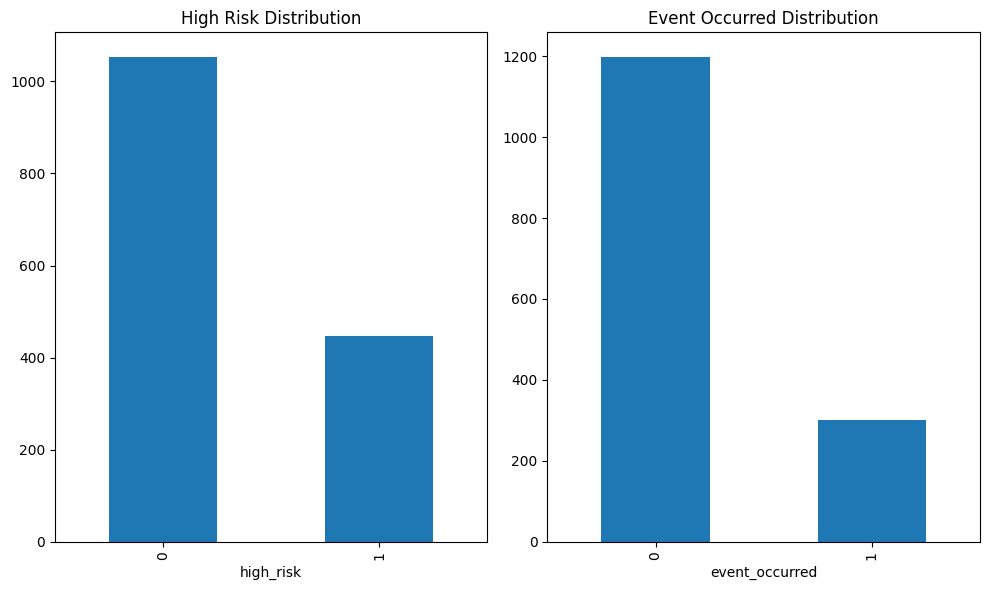

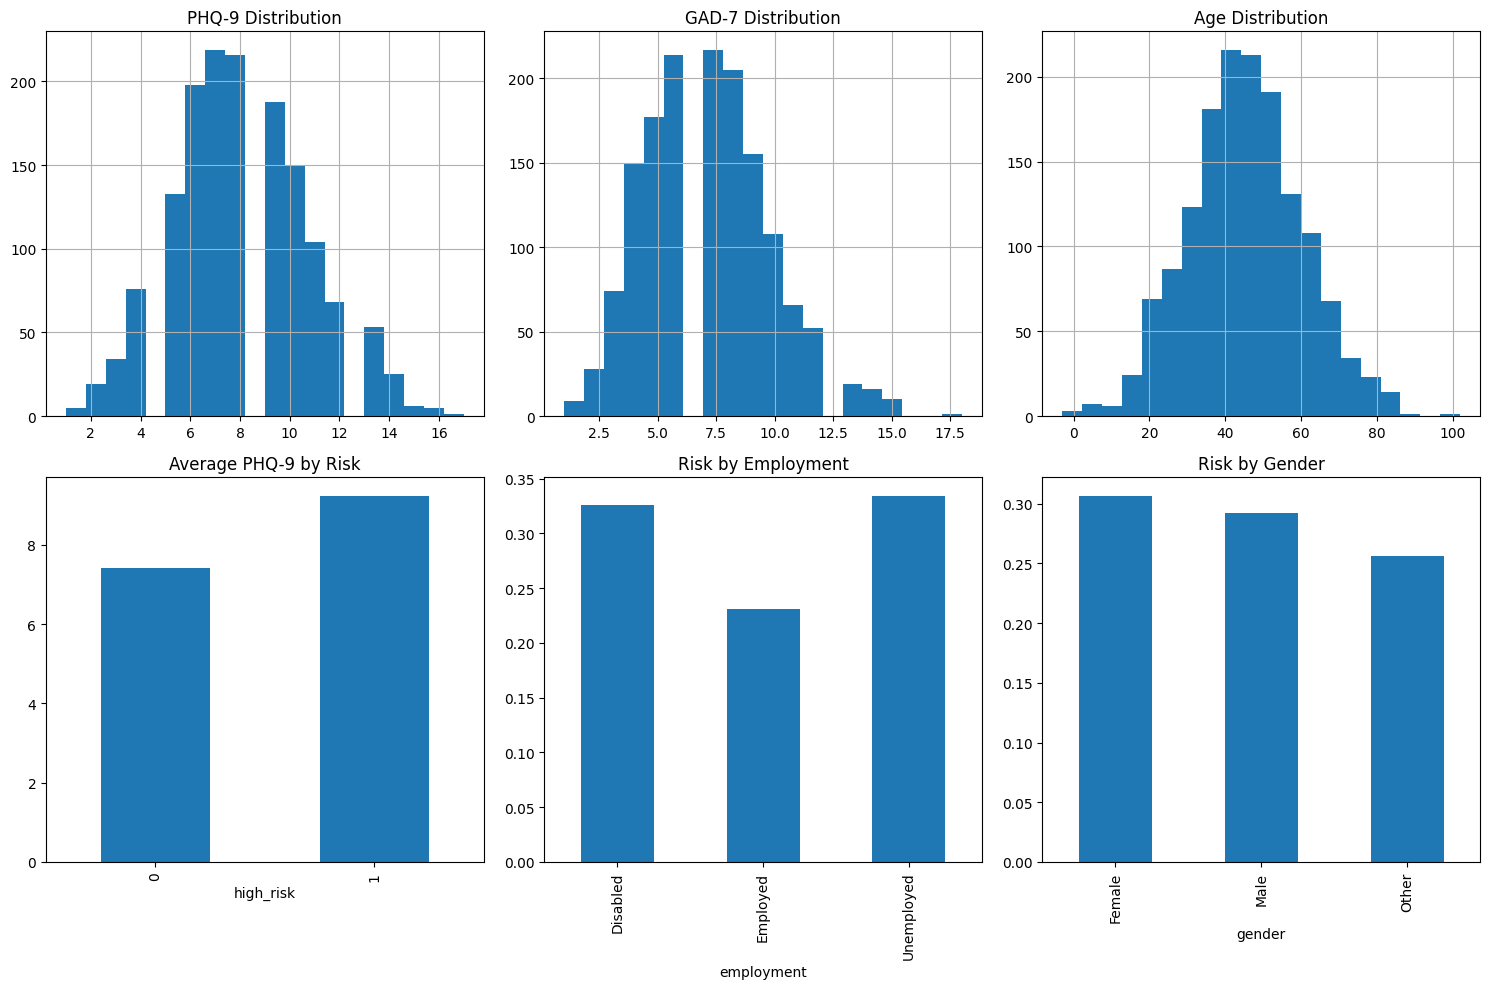

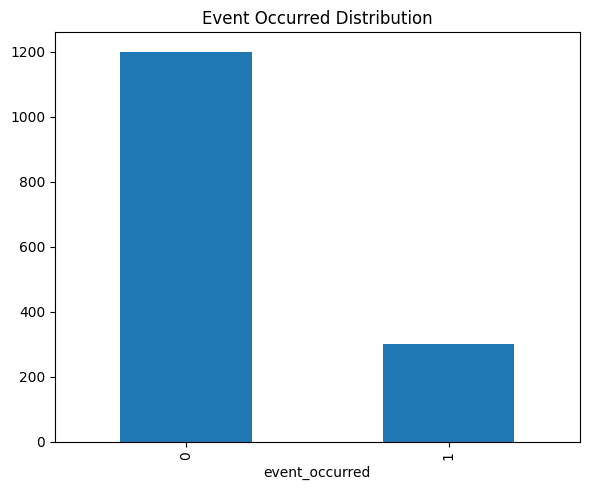

In [14]:
# 3: Basic statistics
print("DESCRIPTIVE STATISTICS")
print("=" * 40)

# Numerical variables summary
print("\nNumerical Variables Summary:")
num_cols = ['age', 'phq9_score', 'gad7_score', 'bp_systolic', 'heart_rate', 'time_to_event']
desc_stats = data[num_cols].describe()
display(desc_stats)

# Categorical variables summary
print("\nCategorical Variables Summary:")
cat_cols = ['gender', 'education', 'employment', 'high_risk', 'event_occurred']
for col in cat_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())
    print(f"Proportions:")
    print(data[col].value_counts(normalize=True).round(3))

#plots for key variables
# Risk distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
data['high_risk'].value_counts().plot(kind='bar')
plt.title('High Risk Distribution')

plt.subplot(1, 2, 2)
data['event_occurred'].value_counts().plot(kind='bar')
plt.title('Event Occurred Distribution')
plt.tight_layout()
plt.show()

# Key clinical distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
data['phq9_score'].hist(ax=axes[0,0], bins=20)
axes[0,0].set_title('PHQ-9 Distribution')

data['gad7_score'].hist(ax=axes[0,1], bins=20)
axes[0,1].set_title('GAD-7 Distribution')

data['age'].hist(ax=axes[0,2], bins=20)
axes[0,2].set_title('Age Distribution')

data.groupby('high_risk')['phq9_score'].mean().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Average PHQ-9 by Risk')

data.groupby('employment')['high_risk'].mean().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Risk by Employment')

data.groupby('gender')['high_risk'].mean().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Risk by Gender')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(6,5))
data['event_occurred'].value_counts().plot(kind='bar', ax=ax)
ax.set_title('Event Occurred Distribution')
plt.tight_layout()
plt.show()


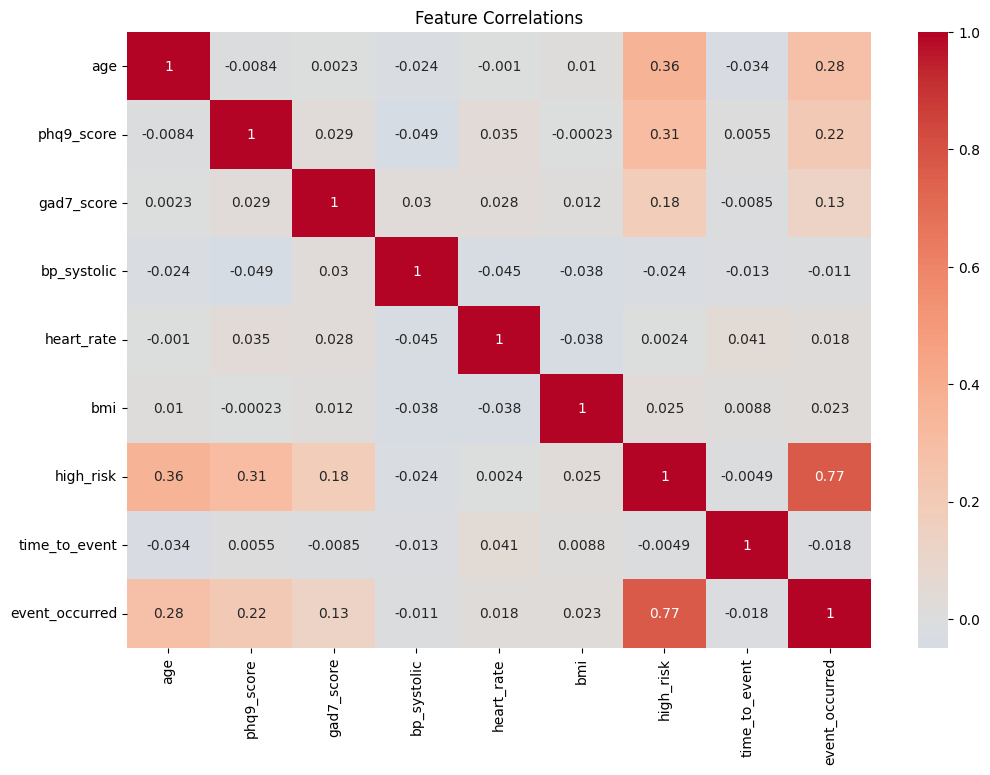

STATISTICAL COMPARISONS: HIGH RISK vs LOW RISK

T-TESTS FOR NUMERICAL VARIABLES:

phq9_score:
  High Risk (n=446): Mean = 9.24, SD = 2.68
  Low Risk  (n=1054): Mean = 7.42, SD = 2.52
  T-statistic = 12.243, P-value = 0.0000
  Effect size (Cohen's d) = 0.700

gad7_score:
  High Risk (n=446): Mean = 7.87, SD = 2.84
  Low Risk  (n=1054): Mean = 6.80, SD = 2.56
  T-statistic = 6.838, P-value = 0.0000
  Effect size (Cohen's d) = 0.394

age:
  High Risk (n=446): Mean = 53.54, SD = 14.12
  Low Risk  (n=1054): Mean = 41.72, SD = 13.72
  T-statistic = 14.944, P-value = 0.0000
  Effect size (Cohen's d) = 0.849

bp_systolic:
  High Risk (n=446): Mean = 129.09, SD = 19.75
  Low Risk  (n=1054): Mean = 130.11, SD = 19.03
  T-statistic = -0.923, P-value = 0.3563
  Effect size (Cohen's d) = -0.053

heart_rate:
  High Risk (n=446): Mean = 75.00, SD = 14.02
  Low Risk  (n=1054): Mean = 74.92, SD = 14.62
  T-statistic = 0.096, P-value = 0.9238
  Effect size (Cohen's d) = 0.005
CHI-SQUARE TESTS FOR CATEGO

high_risk,0,1
gender,,
Female,513,227
Male,483,199
Other,58,20


Chi-square statistic: 1.040
P-value: 0.5945
Degrees of freedom: 2
  Female: OR = 1.093
  Male: OR = 0.952
  Other: OR = 0.806

EDUCATION vs HIGH_RISK:


high_risk,0,1
education,,
College,354,156
Graduate,358,162
High School,342,128


Chi-square statistic: 2.086
P-value: 0.3524
Degrees of freedom: 2
  College: OR = 1.064
  Graduate: OR = 1.109
  High School: OR = 0.838

EMPLOYMENT vs HIGH_RISK:


high_risk,0,1
employment,,
Disabled,347,168
Employed,383,115
Unemployed,324,163


Chi-square statistic: 15.823
P-value: 0.0004
Degrees of freedom: 2
  Disabled: OR = 1.231
  Employed: OR = 0.609
  Unemployed: OR = 1.298


In [15]:
#Inferentials
# Correlation analysis
numeric_cols = data.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

# Cell 6: Statistical tests - Compare groups
print("STATISTICAL COMPARISONS: HIGH RISK vs LOW RISK")
print("=" * 50)

# Compare means between high risk and low risk groups
print("\nT-TESTS FOR NUMERICAL VARIABLES:")
for var in ['phq9_score', 'gad7_score', 'age', 'bp_systolic', 'heart_rate']:
    low_risk = data[data['high_risk'] == 0][var]
    high_risk = data[data['high_risk'] == 1][var]
    
    t_stat, p_value = stats.ttest_ind(high_risk, low_risk, equal_var=False)
    
    print(f"\n{var}:")
    print(f"  High Risk (n={len(high_risk)}): Mean = {high_risk.mean():.2f}, SD = {high_risk.std():.2f}")
    print(f"  Low Risk  (n={len(low_risk)}): Mean = {low_risk.mean():.2f}, SD = {low_risk.std():.2f}")
    print(f"  T-statistic = {t_stat:.3f}, P-value = {p_value:.4f}")
    print(f"  Effect size (Cohen's d) = {(high_risk.mean() - low_risk.mean()) / np.sqrt((high_risk.std()**2 + low_risk.std()**2)/2):.3f}")

# Risk factors analysis - Chi-square tests for categorical variables
print("CHI-SQUARE TESTS FOR CATEGORICAL VARIABLES")
print("=" * 50)

categorical_vars = ['gender', 'education', 'employment']

for var in categorical_vars:
    print(f"\n{var.upper()} vs HIGH_RISK:")
    contingency_table = pd.crosstab(data[var], data['high_risk'])
    display(contingency_table)
    
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
    # Calculate odds ratios for each category
    for category in contingency_table.index:
        if len(contingency_table.loc[category]) == 2:
            a = contingency_table.loc[category, 1]  # high risk
            b = contingency_table.loc[category, 0]  # low risk
            total_high_risk = contingency_table[1].sum()
            total_low_risk = contingency_table[0].sum()
            
            c = total_high_risk - a
            d = total_low_risk - b
            
            odds_ratio = (a * d) / (b * c) if (b * c) > 0 else np.inf
            print(f"  {category}: OR = {odds_ratio:.3f}")